In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import warnings
from pandas.core.nanops import nanmean as pd_nanmean

from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
energy_consumption = pd.read_csv('AEP_hourly.csv', sep =',')
energy_consumption.head(4)


In [ ]:
energy_consumption.sort_values('Datetime', axis = 0, inplace = True)

#energy_consumption = energy_consumption.iloc[-30000:]
energy_consumption['Datetime'] = pd.to_datetime(energy_consumption.Datetime, format='%Y-%m-%d %H:%M:%S')
energy_consumption.index = energy_consumption.Datetime
energy_consumption.drop('Datetime', axis = 1, inplace = True)

In [ ]:
energy_consumption.AEP_MW.plot(figsize=(15,6),title ='Потребление энергии', fontsize =14)

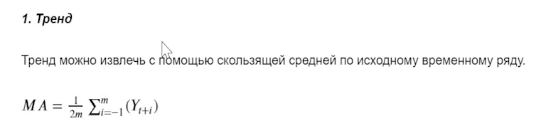

In [ ]:
fig, axes = plt.subplots(2,2,sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

window = 24
axes[0][0].plot(energy_consumption.index, energy_consumption, label='Original')
axes[0][0].plot(energy_consumption.index, energy_consumption.rolling(window=window).mean(), label='1-day rolling mean')
axes[0][0].set_title("1-day rolling mean")
axes[0][0].legend(loc='best')

window = 24*7
axes[0][1].plot(energy_consumption.index, energy_consumption, label='Original')
axes[0][1].plot(energy_consumption.index, energy_consumption.rolling(window=window).mean(), label='1-week rolling mean')
axes[0][1].set_title("1-week rolling mean")
axes[0][1].legend(loc='best')

window = 24*30
axes[1][0].plot(energy_consumption.index, energy_consumption, label='Original')
axes[1][0].plot(energy_consumption.index, energy_consumption.rolling(window=window).mean(), label='1-month rolling mean')
axes[1][0].set_title("1-month rolling mean")
axes[1][0].legend(loc='best')

window = 24*30*6
axes[1][1].plot(energy_consumption.index, energy_consumption, label='Original')
axes[1][1].plot(energy_consumption.index, energy_consumption.rolling(window=window).mean(), label='0.5-year rolling mean')
axes[1][1].set_title("0.5-year rolling mean")
axes[1][1].legend(loc='best')

Сезонность
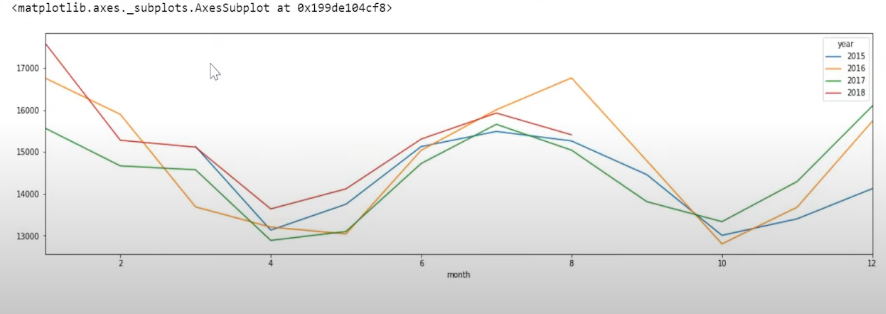


Остатки
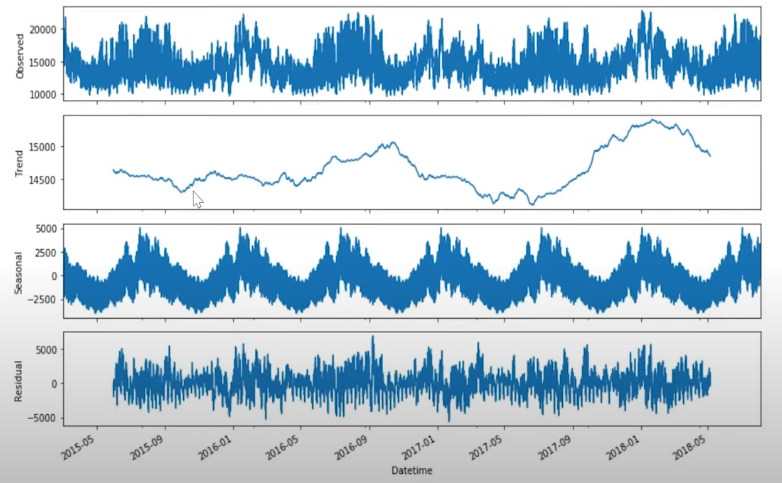

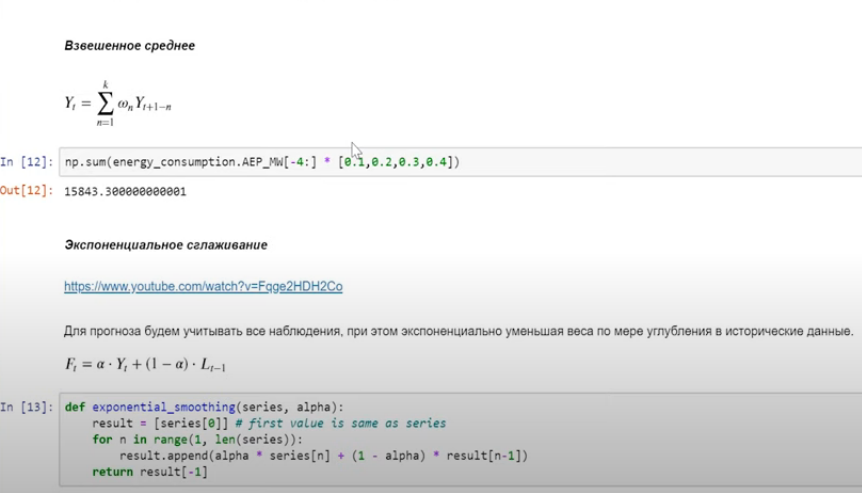

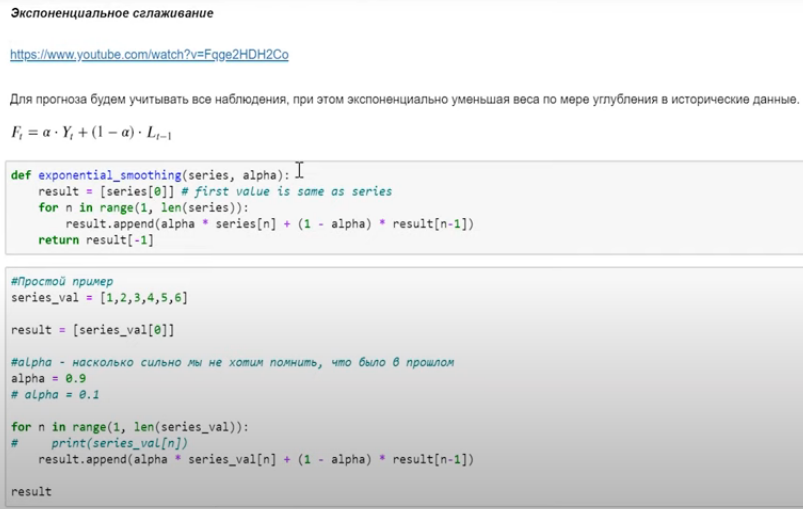

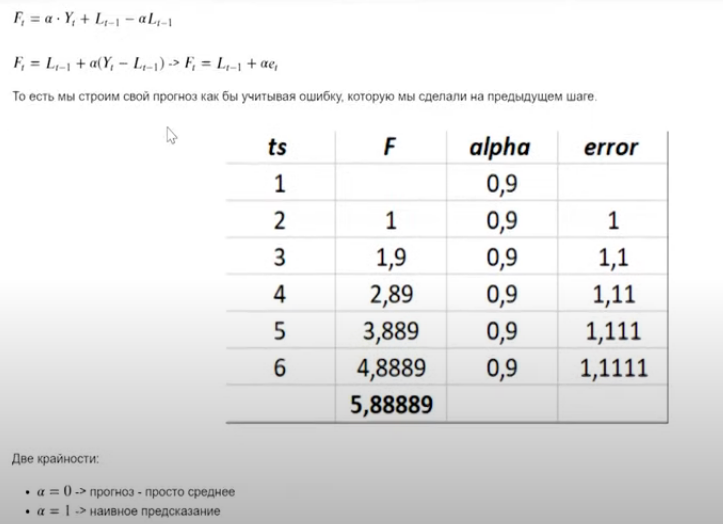

***Попробуем предскозать потребление энергии за последнюю неделю. Отделим train и test.***


In [7]:
train = energy_consumption.AEP_MW.iloc[:-24*7]
test = energy_consumption.AEP_MW.iloc[-24*7:]

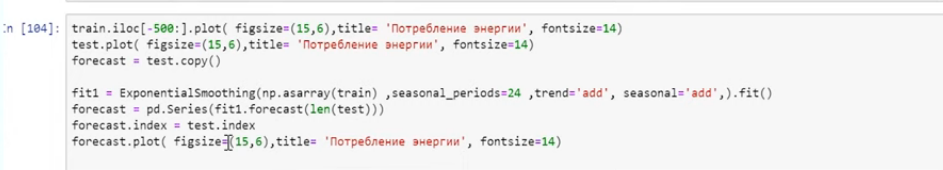

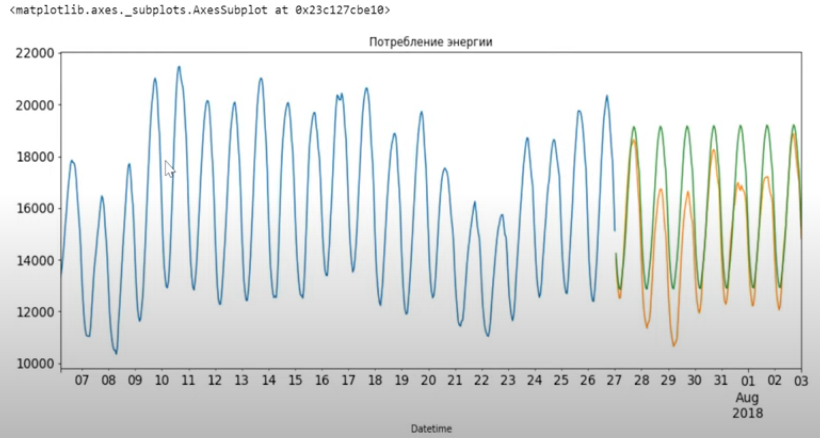